Twitter US Airline Sentiment: [Dataset](https://www.kaggle.com/crowdflower/twitter-airline-sentiment)

In [1]:
import pandas as pd
import numpy as np
from pandas.api.types import CategoricalDtype
from plotnine import *
from plotnine.data import mpg
import os
import sys
import json
from math import *
from collections import *


In [2]:
df = pd.read_csv('Tweets.csv')
df

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14635,569587686496825344,positive,0.3487,NaN,0.0000,American,NaN,KristenReenders,NaN,0,@AmericanAir thank you we got on a different f...,NaN,2015-02-22 12:01:01 -0800,NaN,NaN
14636,569587371693355008,negative,1.0000,Customer Service Issue,1.0000,American,NaN,itsropes,NaN,0,@AmericanAir leaving over 20 minutes Late Flig...,NaN,2015-02-22 11:59:46 -0800,Texas,NaN
14637,569587242672398336,neutral,1.0000,NaN,NaN,American,NaN,sanyabun,NaN,0,@AmericanAir Please bring American Airlines to...,NaN,2015-02-22 11:59:15 -0800,"Nigeria,lagos",NaN
14638,569587188687634433,negative,1.0000,Customer Service Issue,0.6659,American,NaN,SraJackson,NaN,0,"@AmericanAir you have my money, you change my ...",NaN,2015-02-22 11:59:02 -0800,New Jersey,Eastern Time (US & Canada)


In [3]:
df["airline_sentiment"].describe()

count        14640
unique           3
top       negative
freq          9178
Name: airline_sentiment, dtype: object

In [4]:
df["airline_sentiment"].value_counts()

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

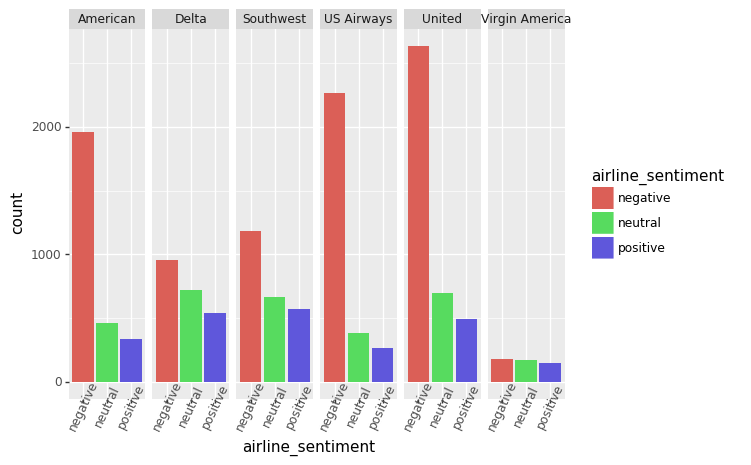

<ggplot: (-9223371906792102740)>
It seems like Delta and Soutwest got more positive reviews.


In [5]:
sentiments_airlines = (ggplot(df, aes(x = "airline_sentiment", fill = "airline_sentiment")) +
  geom_bar() +
  facet_grid(". ~ airline") +
  theme(axis_text_x = element_text(angle=65, vjust=0.6)))
print(sentiments_airlines)
print("It seems like Delta and Soutwest got more positive reviews.")

In [6]:
airline_sentiment = ["negative"]
airline=["United"]

print("Number of",airline_sentiment[0], "tweets about American Airlines:",len(df[df.airline_sentiment.isin(airline_sentiment) & 
           df.airline.isin(airline)]))

Number of negative tweets about American Airlines: 2633


### Removing Stop Words from Tweets

In [7]:
import re
from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

# add other unnecessary tokens to stopping words
stop_words.append('...')
stop_words.append('-->')
stop_words.append('i\'m')

In [8]:
def tokenizeTweets(tweets):
    tknzr = TweetTokenizer()
    words = []
    counts = []
    for i in range(len(tweets)):
        # Remove hashtags, mentions, links and numbers from tweet. 
        tweets[i] = re.sub(r"@(\w+)", ' ', tweets[i], flags=re.MULTILINE)
        tweets[i] = re.sub(r"#(\w+)", ' ', tweets[i], flags=re.MULTILINE)
        tweets[i] = re.sub(r"http\S+", " ", tweets[i], flags=re.MULTILINE)
        tweets[i] = re.sub(r'[0-9]+', '', tweets[i], flags=re.MULTILINE)
        # Find occurences of each unique word in tweet and add them to words and counts list.
        for token in tknzr.tokenize(tweets[i].lower()):
            if token not in stop_words and len(token) > 1:
                if token not in words:
                    words.append(token)
                    counts.append(1)
                else:
                    counts[words.index(token)] += 1
    return words, counts


         Word  Frequency
45     thanks        607
169     thank        453
50     flight        375
30      great        236
142   service        161
66       love        131
190       get        114
141  customer        113
265      guys        110
15         :)        109


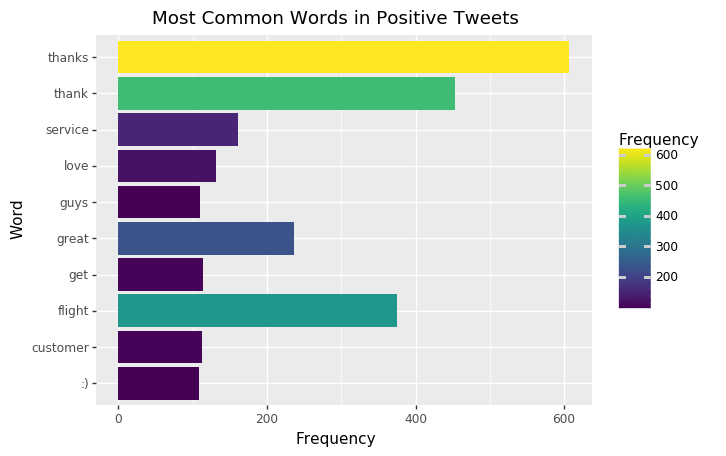

<ggplot: (-9223371906790793232)>

In [9]:
positive = df.loc[df["airline_sentiment"] == "positive"]
tweets = positive["text"].to_numpy()

words, counts = tokenizeTweets(tweets)


d = {'Word':words,'Frequency':counts}
positive_df = pd.DataFrame(d, columns=['Word','Frequency']).sort_values(by=['Frequency'],ascending=False)
print(positive_df[:10])

(ggplot(positive_df[:10]) + 
   geom_bar(mapping = aes(x = 'Word', y='Frequency', fill='Frequency'), stat = "identity", size=20) +
   coord_flip() +
   ggtitle('Most Common Words in Positive Tweets')
)


## Negative Tweets with airline_sentiment_confidence = 1.0

          Word  Frequency
15      flight       2438
71         get        799
155  cancelled        794
144    service        681
388      hours        608
123       hold        567
143   customer        550
186       time        507
34        help        457
197      plane        448


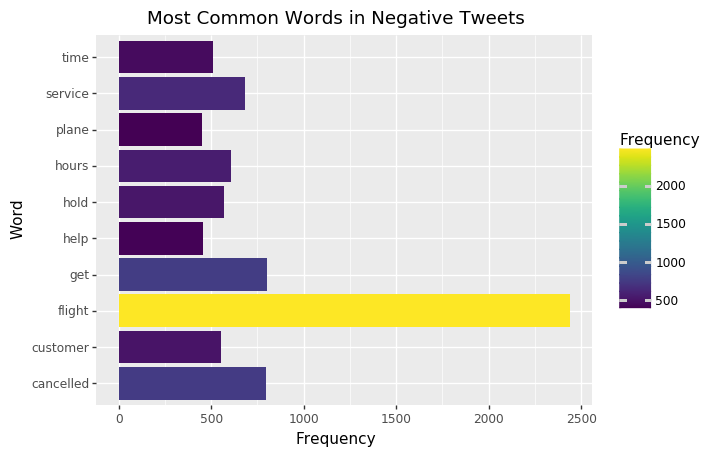

<ggplot: (-9223371906789517460)>

In [10]:
negative = df.loc[df["airline_sentiment"] == "negative"]
negative = negative.loc[negative["airline_sentiment_confidence"] == 1.0]
negative

tweets = negative["text"].to_numpy()

words_bad, counts_bad = tokenizeTweets(tweets)

d = {'Word':words_bad,'Frequency':counts_bad}
negative_df = pd.DataFrame(d, columns=['Word','Frequency']).sort_values(by=['Frequency'],ascending=False)
print(negative_df[:10])

(ggplot(negative_df[:10]) + 
   geom_bar(mapping = aes(x = 'Word', y='Frequency', fill='Frequency'), stat = "identity", size=20) +
   coord_flip() +
   ggtitle('Most Common Words in Negative Tweets')
)

#### Negative Reasons except "Can't Tell" with negativereason_confidence = 1.0

In [11]:
df['negativereason'].value_counts(normalize=True) * 100
print("Şikayet Nedeni Bildirilmemişlerin Yüzdesi", df['negativereason'].value_counts(normalize=True)[2] * 100)

Şikayet Nedeni Bildirilmemişlerin Yüzdesi 12.965787753323163


In [12]:
negative = df.loc[df["airline_sentiment"] == "negative"]
negative = negative.loc[negative["negativereason_confidence"] == 1.0]
negative = negative.loc[negative["negativereason"] != "Can't Tell"]
# You can check NaN values in cells with this line. Bu there is no NaN values for negative tweets in negativereason column
negative

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
17,570276917301137409,negative,1.0,Bad Flight,1.0,Virgin America,NaN,heatherovieda,NaN,0,@VirginAmerica I flew from NYC to SFO last we...,NaN,2015-02-24 09:39:46 -0800,this place called NYC,Eastern Time (US & Canada)
25,570249102404923392,negative,1.0,Customer Service Issue,1.0,Virgin America,NaN,Leora13,NaN,0,@VirginAmerica status match program. I applie...,NaN,2015-02-24 07:49:15 -0800,NaN,NaN
28,570207886493782019,negative,1.0,Bad Flight,1.0,Virgin America,NaN,blackjackpro911,NaN,0,@VirginAmerica amazing to me that we can't get...,"[42.361016, -71.02000488]",2015-02-24 05:05:28 -0800,"San Mateo, CA & Las Vegas, NV",NaN
30,570114021854212096,negative,1.0,Flight Booking Problems,1.0,Virgin America,NaN,jordanpichler,NaN,0,@VirginAmerica hi! I just bked a cool birthday...,NaN,2015-02-23 22:52:29 -0800,NaN,Vienna
32,570088404156698625,negative,1.0,Customer Service Issue,1.0,Virgin America,NaN,Cuschoolie1,NaN,0,"@VirginAmerica help, left expensive headphones...","[33.94209449, -118.40410103]",2015-02-23 21:10:41 -0800,Washington DC,Quito
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14627,569588816438169600,negative,1.0,Cancelled Flight,1.0,American,NaN,KristinaMeyer7,NaN,0,"@AmericanAir Flight Cancelled Flightled, can't...",NaN,2015-02-22 12:05:30 -0800,NaN,Eastern Time (US & Canada)
14629,569588591602458624,negative,1.0,Customer Service Issue,1.0,American,NaN,jontgreen89,NaN,0,@AmericanAir How do I change my flight if the ...,NaN,2015-02-22 12:04:37 -0800,"Waco, TX",Central Time (US & Canada)
14631,569588464896876545,negative,1.0,Bad Flight,1.0,American,NaN,MDDavis7,NaN,0,@AmericanAir thx for nothing on getting us out...,NaN,2015-02-22 12:04:07 -0800,US,Eastern Time (US & Canada)
14633,569587705937600512,negative,1.0,Cancelled Flight,1.0,American,NaN,RussellsWriting,NaN,0,@AmericanAir my flight was Cancelled Flightled...,NaN,2015-02-22 12:01:06 -0800,Los Angeles,Arizona


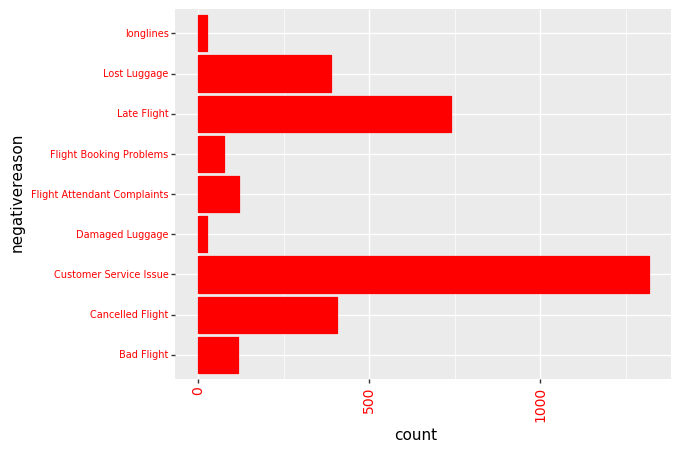

<ggplot: (-9223371906791816252)>

In [13]:
my_custom_theme = theme(axis_text_x = element_text(color="red", size=10,
                                                         angle=90, hjust=.5),
                           axis_text_y = element_text(color="red", size=7))
(ggplot(data=negative,
           mapping=aes(x='negativereason')) +
    geom_bar(color="red", fill="red" ) +
    coord_flip() +
    my_custom_theme
)


In [14]:
import emoji
def tokenizeEmots(tweets):
    tknzr = TweetTokenizer()
    emots = []
    counts = []
    for i in range(len(tweets)):
        # Remove hashtags, mentions, links and numbers from tweet. 
        tweets[i] = re.sub(r"@(\w+)", ' ', tweets[i], flags=re.MULTILINE)
        tweets[i] = re.sub(r"#(\w+)", ' ', tweets[i], flags=re.MULTILINE)
        tweets[i] = re.sub(r"http\S+", " ", tweets[i], flags=re.MULTILINE)
        tweets[i] = re.sub(r'[0-9]+', '', tweets[i], flags=re.MULTILINE)
        # Find occurences of each unique emot in tweet and add them to emots and counts list.
        for token in tknzr.tokenize(tweets[i].lower()):
            if token in emoji.UNICODE_EMOJI:
                if token not in emots:
                    emots.append(token)
                    counts.append(1)
                else:
                    counts[emots.index(token)] += 1
    return emots, counts

tweets = df["text"].to_numpy()

emots, counts = tokenizeEmots(tweets)
d = {'Emoticon':emots,'Frequency':counts}
pd.DataFrame(d, columns=['Emoticon','Frequency']).sort_values(by=['Frequency'],ascending=False)[:20]


,Emoticon,Frequency
48,🙏,60
6,✈,57
22,😂,50
16,😭,41
2,👍,40
3,😡,32
9,😊,31
0,❤,31
21,👏,27
4,😢,26


In [15]:
negative = df.loc[df["airline_sentiment"] == "negative"]
print("On Negative Tweets")
print(negative["name"].value_counts()[:10])
print("--------------------")
print("On Positive Tweets")
positive = df.loc[df["airline_sentiment"] == "positive"]
print(positive["name"].value_counts()[:10])


On Negative Tweets
otisday            28
_mhertz            27
throthra           24
rossj987           23
weezerandburnie    23
GREATNESSEOA       18
ThatJasonEaton     18
chagaga2013        18
scoobydoo9749      18
ElmiraBudMan       18
Name: name, dtype: int64
--------------------
On Positive Tweets
SMHillman          11
Logunov_Daniil     10
NoviceFlyer         7
kbosspotter         6
NickTypesWords      6
The_Playmaker20     5
JetBlueNews         5
georgetietjen       5
gwen1013            4
Mtts28              4
Name: name, dtype: int64


### Sentiment Prediction with Naive Bayes

In [16]:
df = pd.read_csv('tweets_train.csv')

total_negative = df["airline_sentiment"].value_counts()['negative'] + 1
total_positive = df["airline_sentiment"].value_counts()['positive'] + 1
total = total_negative + total_positive

prob_negative = total_negative / total
prob_positive = total_positive / total

print(prob_negative, prob_positive, total)


0.7745398773006135 0.2254601226993865 8476


In [17]:
negative = df.loc[df["airline_sentiment"] == "negative"]
tweets = negative["text"].to_numpy()

words, counts = tokenizeTweets(tweets)
negative_tweet_dict = dict(zip(words, counts))

positive = df.loc[df["airline_sentiment"] == "positive"]
tweets = positive["text"].to_numpy()

words, counts = tokenizeTweets(tweets)
positive_tweet_dict = dict(zip(words, counts))

neutral = df.loc[df["airline_sentiment"] == "neutral"]
tweets = neutral["text"].to_numpy()

words, counts = tokenizeTweets(tweets)
neutral_tweet_dict = dict(zip(words, counts))

total_dict = len(negative_tweet_dict) + len(positive_tweet_dict) + len(neutral_tweet_dict)

prob_negative_all = len(negative_tweet_dict) / total_dict
prob_positive_all = len(positive_tweet_dict) / total_dict
prob_neutral_all = len(neutral_tweet_dict) / total_dict




In [18]:
df = pd.read_csv('tweets_test.csv')
tweets = df["text"].to_numpy()


In [19]:
from sklearn import metrics
print(len(negative_tweet_dict), len(positive_tweet_dict))
y_true = []
y_pred = []

for tweet in tweets:
    list_tweet = []
    list_tweet.append(tweet)
    words, counts = tokenizeTweets(list_tweet)
    negative_prob = 1
    positive_prob = 1
    neutral_prob = 1
    for w in words:
        if w in positive_tweet_dict:
            positive_prob = positive_prob * ((positive_tweet_dict[w] + 1) / (len(positive_tweet_dict) + 3))
        else:
            positive_prob = positive_prob * (1 / (len(positive_tweet_dict) + 3))
            
        if w in negative_tweet_dict:
            negative_prob = negative_prob * ((negative_tweet_dict[w] + 1) / (len(negative_tweet_dict) + 3))
        else:
            negative_prob = negative_prob * (1 / (len(negative_tweet_dict) + 3))
            
        if w in neutral_tweet_dict:
            neutral_prob = neutral_prob * ((neutral_tweet_dict[w] + 1) / (len(neutral_tweet_dict) + 3))
        else:
            neutral_prob = neutral_prob * (1 / (len(neutral_tweet_dict) + 3))
        
    neg_predict = negative_prob * prob_negative_all
    pos_predict = positive_prob * prob_positive_all
    neu_predict = neutral_prob * prob_neutral_all
    predicted_str = ""
    if (neg_predict > pos_predict and neg_predict > neu_predict):
        predicted_str = "negative"
    elif (pos_predict > neg_predict and pos_predict > neu_predict):
        predicted_str = "positive"
    else:
        predicted_str = "neutral"
    
    label_str = df.loc[df["text"] == tweet].iloc[0]["airline_sentiment"]
    y_true.append(label_str)
    y_pred.append(predicted_str)
    
print(metrics.classification_report(y_true, y_pred, digits=3))
    

6986 3066
              precision    recall  f1-score   support

    negative      0.789     0.984     0.875      2608
     neutral      0.678     0.106     0.183       577
    positive      0.745     0.486     0.588       457

    accuracy                          0.782      3642
   macro avg      0.737     0.525     0.549      3642
weighted avg      0.766     0.782     0.730      3642

